In [20]:
# import pandas as pd
# import numpy as np

# # Load your data
# data = pd.read_csv('/content/retail_sales.csv')  # Replace with your actual data file

# # Ensure the Date column is parsed as datetime
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Data Preparation Insights
# 1. Identifying Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handling Missing Values
# If there are any missing values in the 'Sales' column, you can handle them in several ways, such as imputation or removal.
if missing_values['Sales'] > 0:
    # Impute missing values with the mean of the column
    data['Sales'].fillna(data['Sales'].mean(), inplace=True)

    # Alternatively, you can drop the rows with missing values
    # data.dropna(subset=['Sales'], inplace=True)

# Verify missing values have been handled
print("Missing Values After Handling:")
print(data.isnull().sum())

# 2. Feature Engineering
# Extracting additional features from the Date column
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['WeekOfYear'] = data.index.isocalendar().week

# Create 'IsWeekend' feature
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Summary of Feature Engineering
print("\nFeature Engineering Summary:")
print(data.head())

# Optionally, save the updated dataset with new features
data.to_csv('your_retail_sales_data_prepared.csv')


Missing Values:
Sales         0
Year          0
Month         0
Day           0
DayOfWeek     0
WeekOfYear    0
IsWeekend     0
dtype: int64
Missing Values After Handling:
Sales         0
Year          0
Month         0
Day           0
DayOfWeek     0
WeekOfYear    0
IsWeekend     0
dtype: int64

Feature Engineering Summary:
                         Sales  Year  Month  Day  DayOfWeek  WeekOfYear  \
Date                                                                      
2015-01-01 00:00:00  54.048619  2015      1    1          3           1   
2015-01-01 01:00:00  50.161596  2015      1    1          3           1   
2015-01-01 02:00:00  55.954939  2015      1    1          3           1   
2015-01-01 03:00:00  56.553261  2015      1    1          3           1   
2015-01-01 04:00:00  60.487874  2015      1    1          3           1   

                     IsWeekend  
Date                            
2015-01-01 00:00:00          0  
2015-01-01 01:00:00          0  
2015-01-01 02:0

In [31]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Impute missing values with mean (example)
data.fillna(data.mean(), inplace=True)


Sales         0
Year          0
Month         0
Day           0
DayOfWeek     0
WeekOfYear    0
IsWeekend     0
dtype: int64


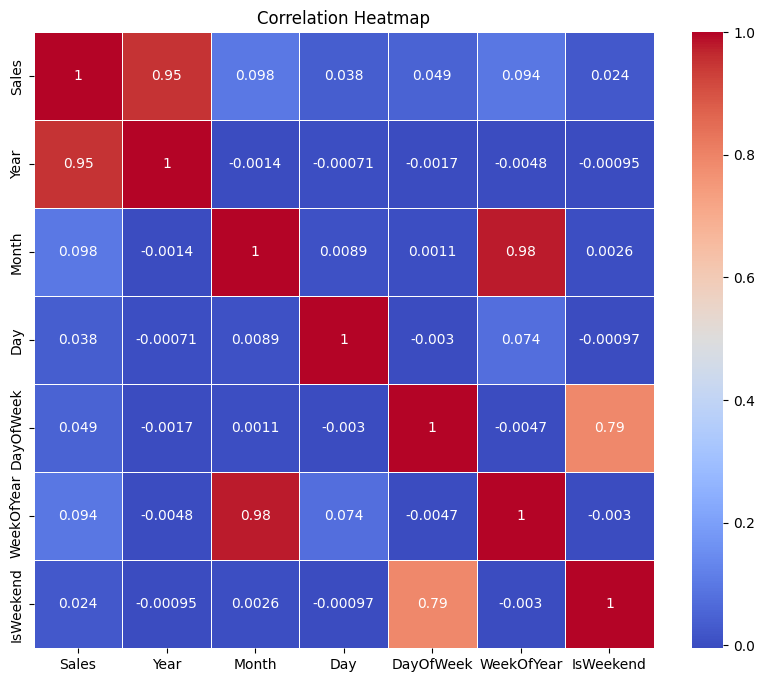

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap")


**coorelation heatmap:**
* sales and Year: There is a strong positive correlation (0.95) between sales and year, indicating that sales have been increasing over the years.
* Year and Month: Very low correlation (-0.0014), as expected since month is a repeating cycle each year.
* Month and WeekOfYear: Very high correlation (0.98), since the week of the year is closely related to the month.
* DayOfWeek and IsWeekend: High correlation (0.79), as the weekend status is determined by the day of the week.

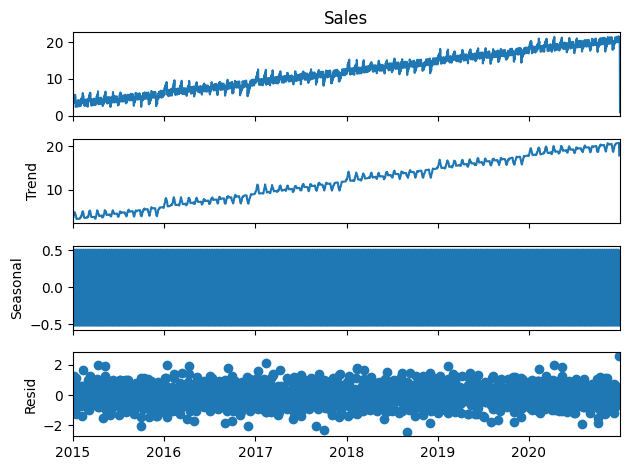

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
data[['Sales']] = scaler.fit_transform(data[['Sales']])

# Min-Max Scaling
scaler = MinMaxScaler()
data[['Sales']] = scaler.fit_transform(data[['Sales']])

# Decompose the time series
data_daily = data.resample('D').sum()
# Perform seasonal decomposition
result_add = seasonal_decompose(data_daily['Sales'], model='additive')
result_add.plot()
plt.savefig("trend_data")


**Time series observation: **
* The sales have a clear ***upward trend*** over time, starting from around 5 units in 2015 and reaching nearly 20 units by 2020.
* Trend: This component shows a ***steady increase*** from 2015 to 2020, confirming the long-term upward trend in sales.
* the seasonal component appears to be a ***constant value (~ zero)***, indicating no significant seasonal pattern is detected.
*The residuals appear to be randomly scattered around zero. which is after removing the trend and seasonal componet.***(no Random Noise)***

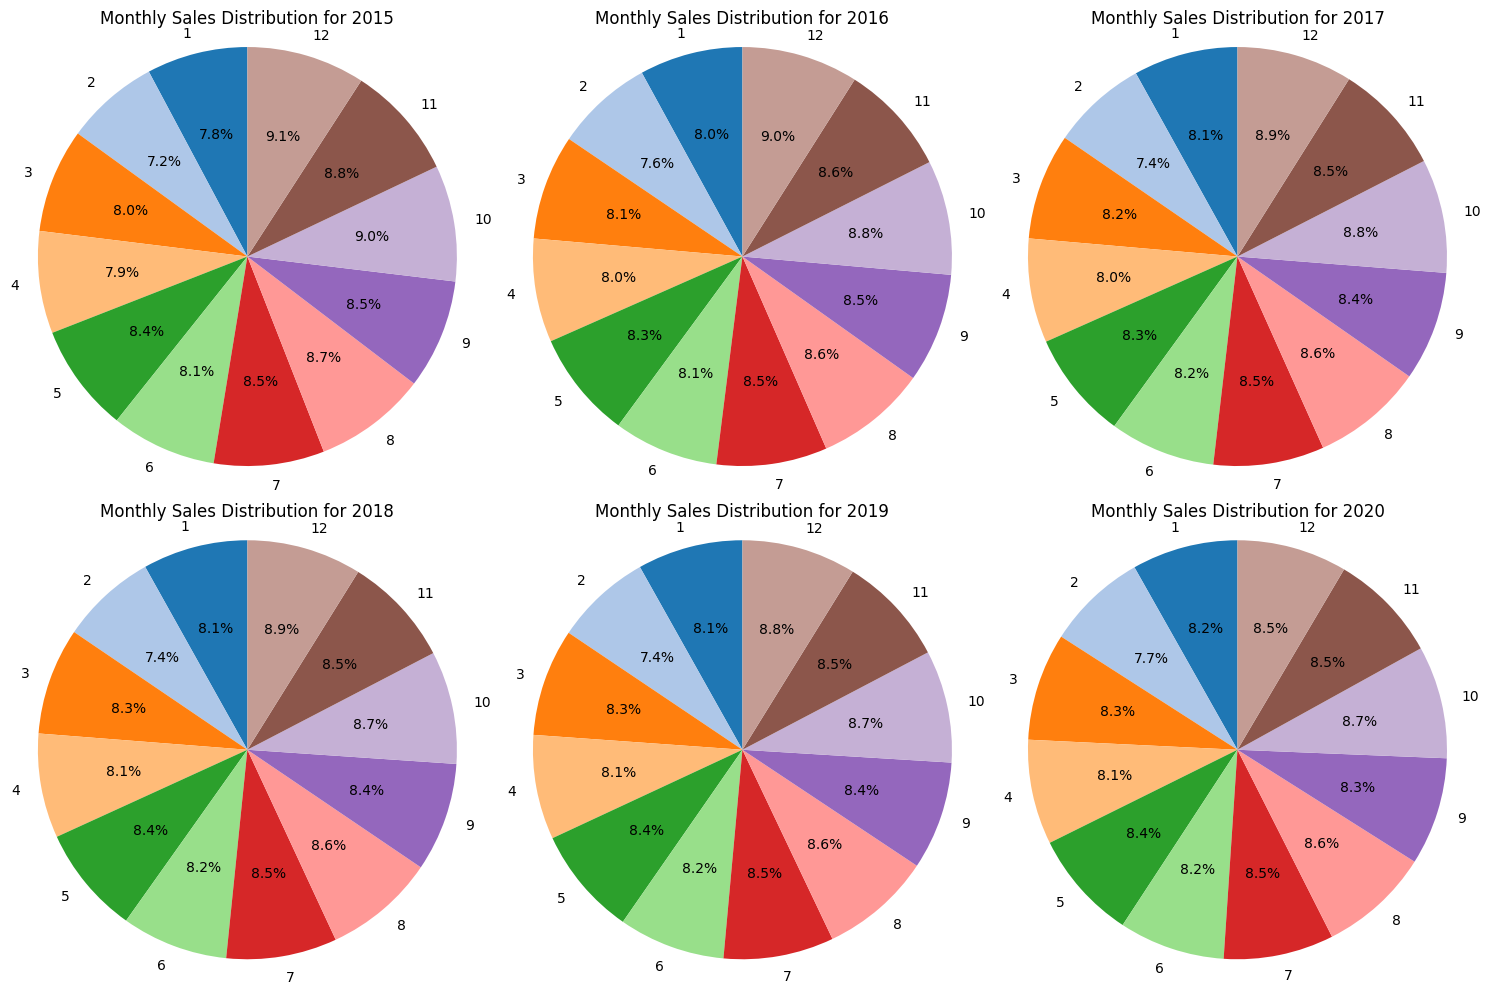

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('/content/your_retail_sales_data_prepared.csv')  # Replace with your actual data file

# Ensure the Date column is parsed as datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample data to monthly frequency, summing up sales per month
monthly_data = data.resample('M').sum()

# Extract year and month for grouping
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.month

# Group by year
years = monthly_data['Year'].unique()

# Determine the number of rows and columns for the subplots
n_years = len(years)
n_cols = 3  # You can adjust this based on your preference
n_rows = (n_years + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting pie charts for each year's monthly sales
for i, year in enumerate(years):
    yearly_data = monthly_data[monthly_data['Year'] == year]

    axes[i].pie(yearly_data['Sales'], labels=yearly_data['Month'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    axes[i].set_title(f'Monthly Sales Distribution for {year}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#plt.savefig(fname="sales_piechart.png")



**observation of sales Piechart:**
1. The pie charts show a balanced and stable monthly sales distribution over the years 2015 to 2020, with minor variations that could be exploited for better business planning and strategy.
2. The data suggests predictability and consistency, which are valuable for operational efficiency and strategic planning in a retail context

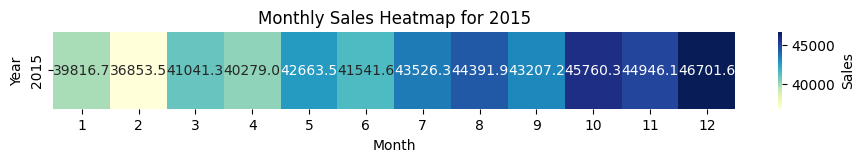

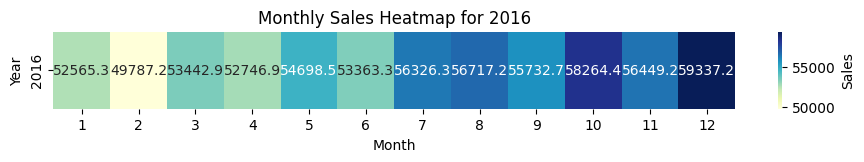

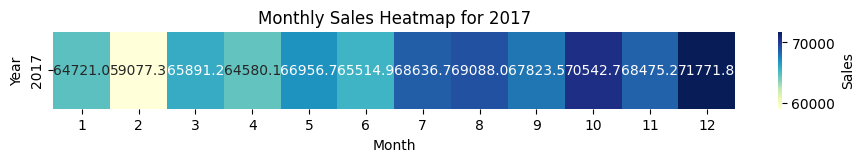

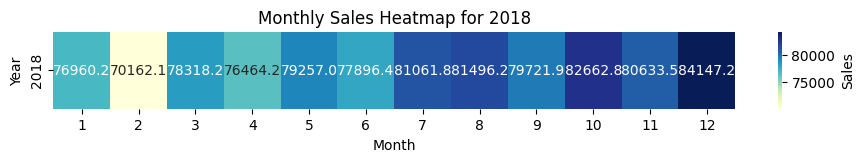

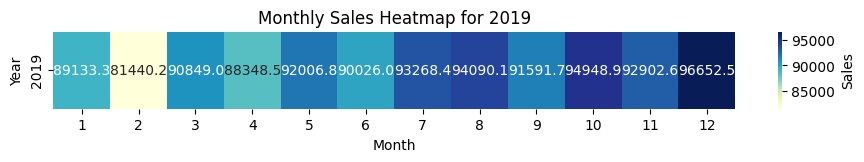

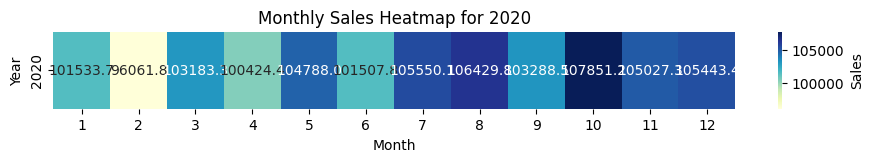

In [17]:
for year in years:
    yearly_data = monthly_data[monthly_data['Year'] == year]

    # Pivot the table to get months as columns
    heatmap_data = yearly_data.pivot_table(values='Sales', index='Year', columns='Month', fill_value=0)

    # Create the heatmap
    plt.figure(figsize=(11, 1))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Sales'})
    plt.title(f'Monthly Sales Heatmap for {year}')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

**Heatmap observation:**
1. Sales seem to increase steadily from 2015 to 2020. Each year shows a higher range of sales compared to the previous year.

2. There is a noticeable seasonal pattern, with sales generally increasing towards the end of the year (November and December).

3. The sales figures in the middle of each year (especially around June to August) also show a significant increase.

In [16]:
# Group by year and month
grouped = monthly_data.groupby(['Year', 'Month']).sum()

# Create a DataFrame to store the lowest and highest sales for each year
summary_stats = []

# Iterate through each year to find lowest, highest sales, and calculate growth
for year in grouped.index.levels[0]:
    yearly_data = grouped.loc[year]
    lowest_month = yearly_data['Sales'].idxmin()
    highest_month = yearly_data['Sales'].idxmax()
    lowest_sales = yearly_data.loc[lowest_month, 'Sales']
    highest_sales = yearly_data.loc[highest_month, 'Sales']
    yearly_growth = (yearly_data['Sales'].iloc[-1] - yearly_data['Sales'].iloc[1]) / yearly_data['Sales'].iloc[0] * 100


    summary_stats.append({
        'Year': year,
        'Lowest_Month': lowest_month,
        'Lowest_Sales': lowest_sales,
        'Highest_Month': highest_month,
        'Highest_Sales': highest_sales,
        'Yearly_Growth (%)': yearly_growth,
    })

# Convert the summary to a DataFrame
summary_df = pd.DataFrame(summary_stats)

# Print the summary statistics
print(summary_df)



   Year  Lowest_Month  Lowest_Sales  Highest_Month  Highest_Sales  \
0  2015             2  36853.531572             12   46701.584084   
1  2016             2  49787.194457             12   59337.233128   
2  2017             2  59077.336429             12   71771.778351   
3  2018             2  70162.109538             12   84147.158782   
4  2019             2  81440.207712             12   96652.482801   
5  2020             2  96061.750837             10  107851.188641   

   Yearly_Growth (%)  
0          24.733457  
1          18.167949  
2          19.614093  
3          18.171789  
4          17.066874  
5           9.239915  


**Growth-rate observation:**
* For understanding the *peak growth in 2015 and the declining growth rates* in subsequent years, we need more data which involves in analyzing market conditions and other factors.





Descriptive Statistics for 2015:
count    8760.000000
mean       58.302400
std         9.349835
min        32.790074
25%        51.477587
50%        58.234575
75%        65.169583
max        84.459207
Name: Sales, dtype: float64


Descriptive Statistics for 2016:
count    8784.000000
mean       75.071836
std         9.344059
min        50.107260
25%        68.240645
50%        75.060585
75%        81.795898
max       101.527927
Name: Sales, dtype: float64


Descriptive Statistics for 2017:
count    8760.000000
mean       91.675708
std         9.350562
min        65.978637
25%        84.807310
50%        91.686813
75%        98.470842
max       117.634226
Name: Sales, dtype: float64


Descriptive Statistics for 2018:
count    8760.000000
mean      108.308389
std         9.362133
min        82.704818
25%       101.487593
50%       108.354926
75%       115.085765
max       134.366979
Name: Sales, dtype: float64


Descriptive Statistics for 2019:
count    8760.000000
mean      125.029452
s

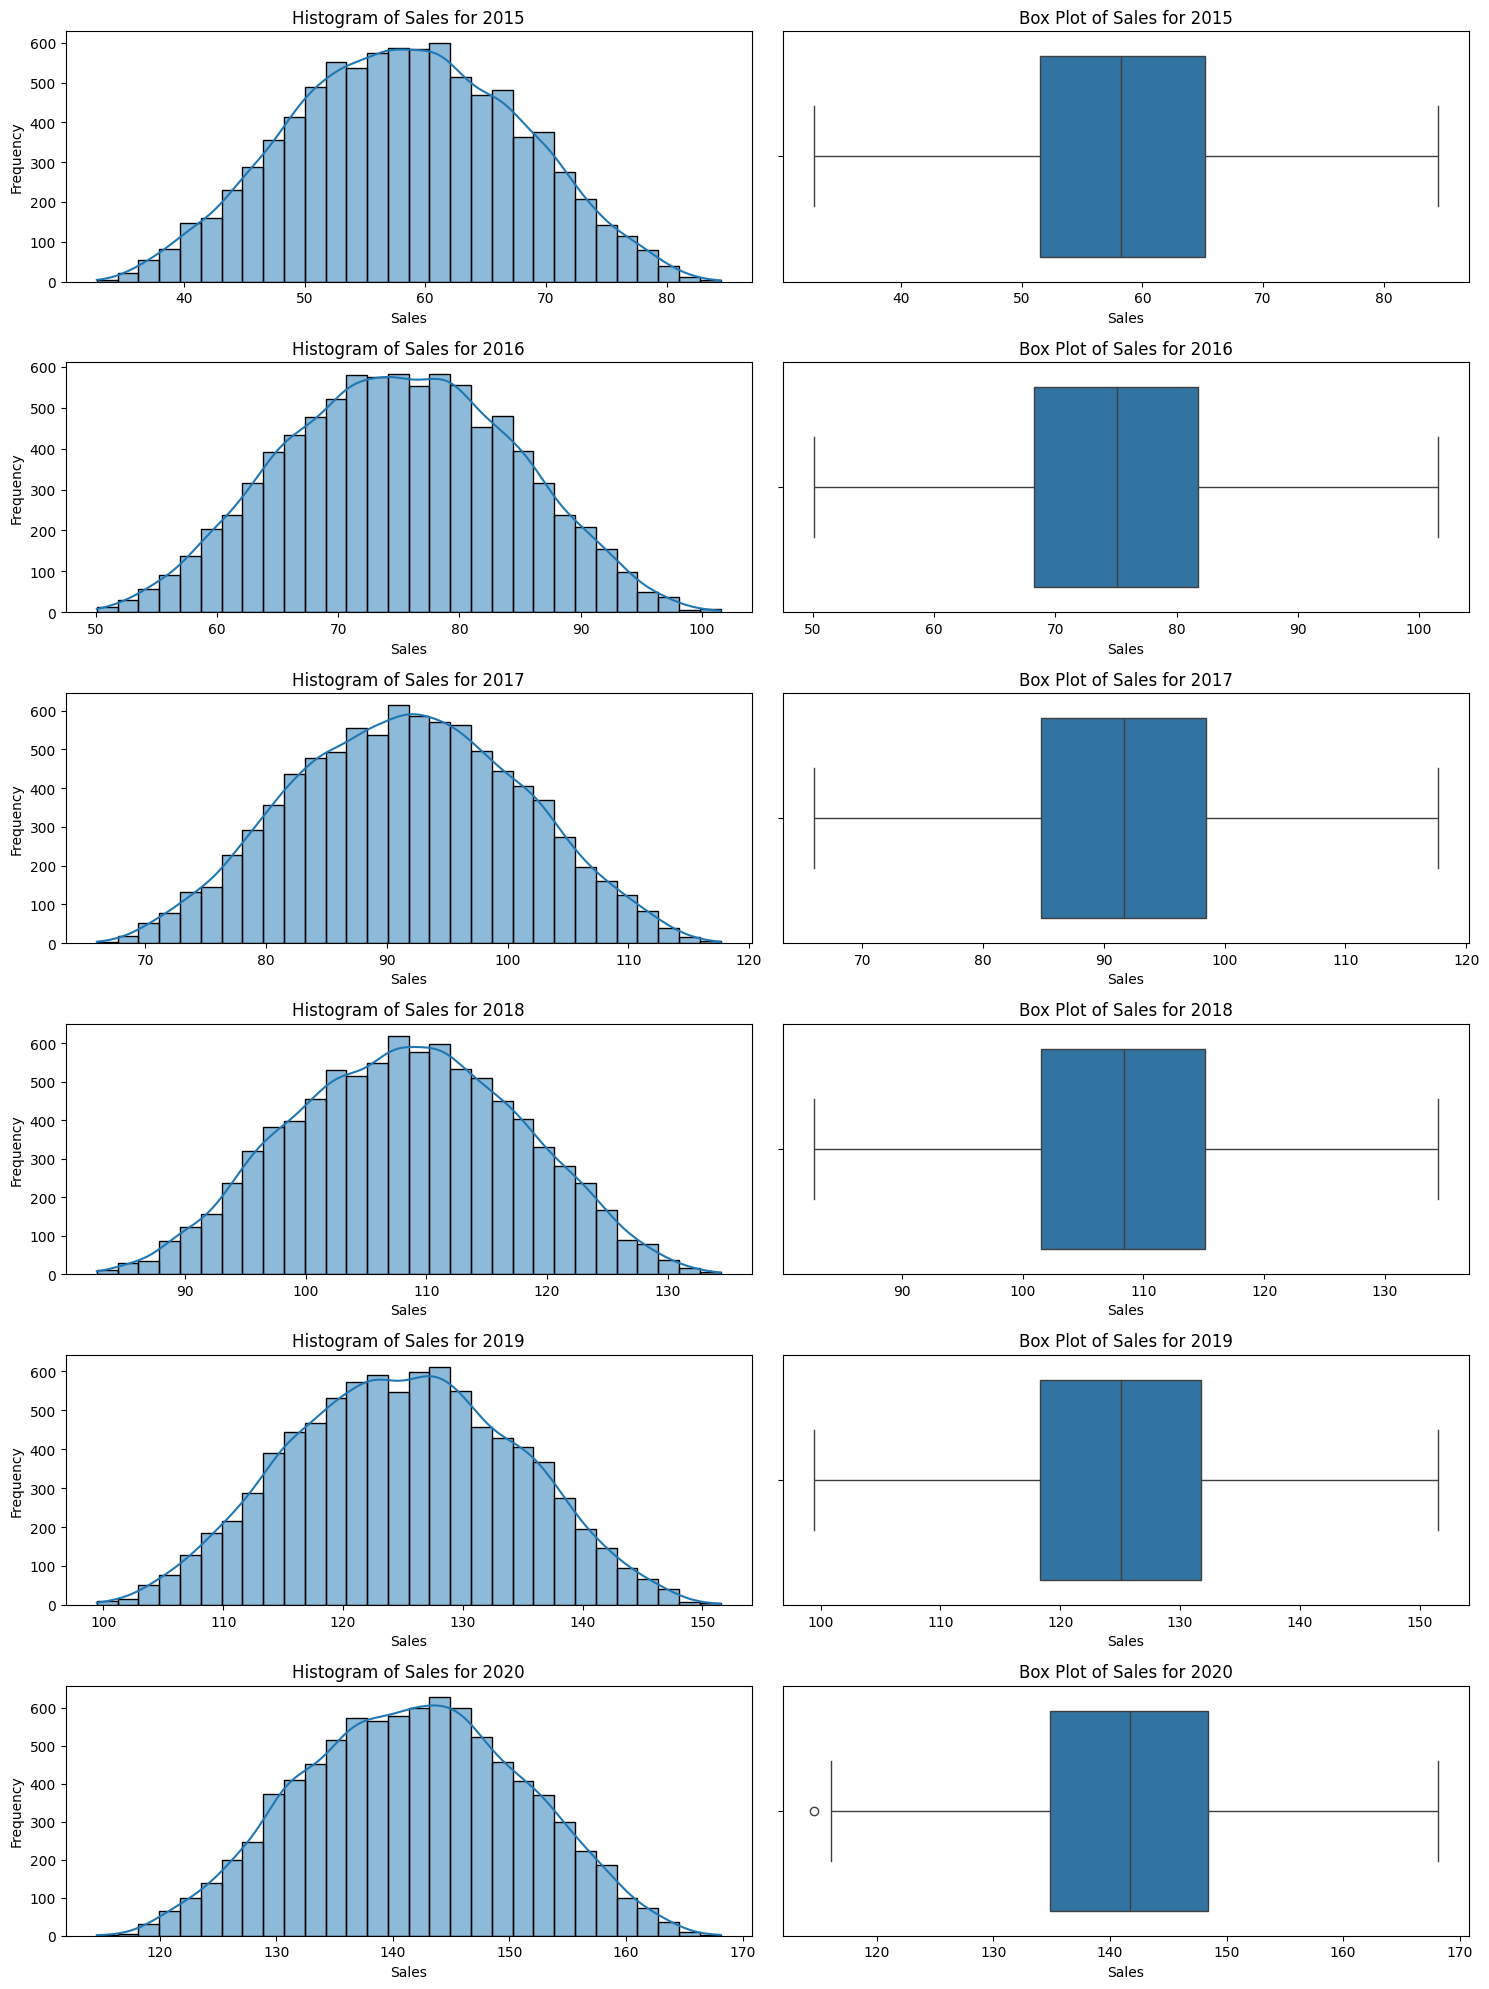

In [19]:

# Plot settings
plt.figure(figsize=(15, 20))

# Generate histograms and box plots for each year
for i, year in enumerate(years):
    yearly_data = data[data['Year'] == year]['Sales']

    # Histogram
    plt.subplot(len(years), 2, 2*i + 1)
    sns.histplot(yearly_data, kde=True, bins=30)
    plt.title(f'Histogram of Sales for {year}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(len(years), 2, 2*i + 2)
    sns.boxplot(x=yearly_data)
    plt.title(f'Box Plot of Sales for {year}')
    plt.xlabel('Sales')

    # Print descriptive statistics
    print(f'Descriptive Statistics for {year}:')
    print(yearly_data.describe())
    print('\n')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('sales_distribution_each_year.png')

# Show the figure
plt.show()

**Yearly sales Observations:**
* Each year's sales data exhibits a *roughly normal distribution*
* The mean and median sales values increase steadily each year, ***reflecting overall growth in sales***, **but growth-rate is lowering by year-over-year**.
* The spread of sales data remains consistent year-over-year, with the absence of significant outliers, **except for a slight outlier in 2020**.

**Identify Outliers**: Calculate the interquartile range (IQR) for the sales data in 2020 and determine the lower and upper bounds for outliers.
**Filter Data**, then we **Remove the outlier** from the dataset and **Replot**

<Figure size 1500x2000 with 0 Axes>

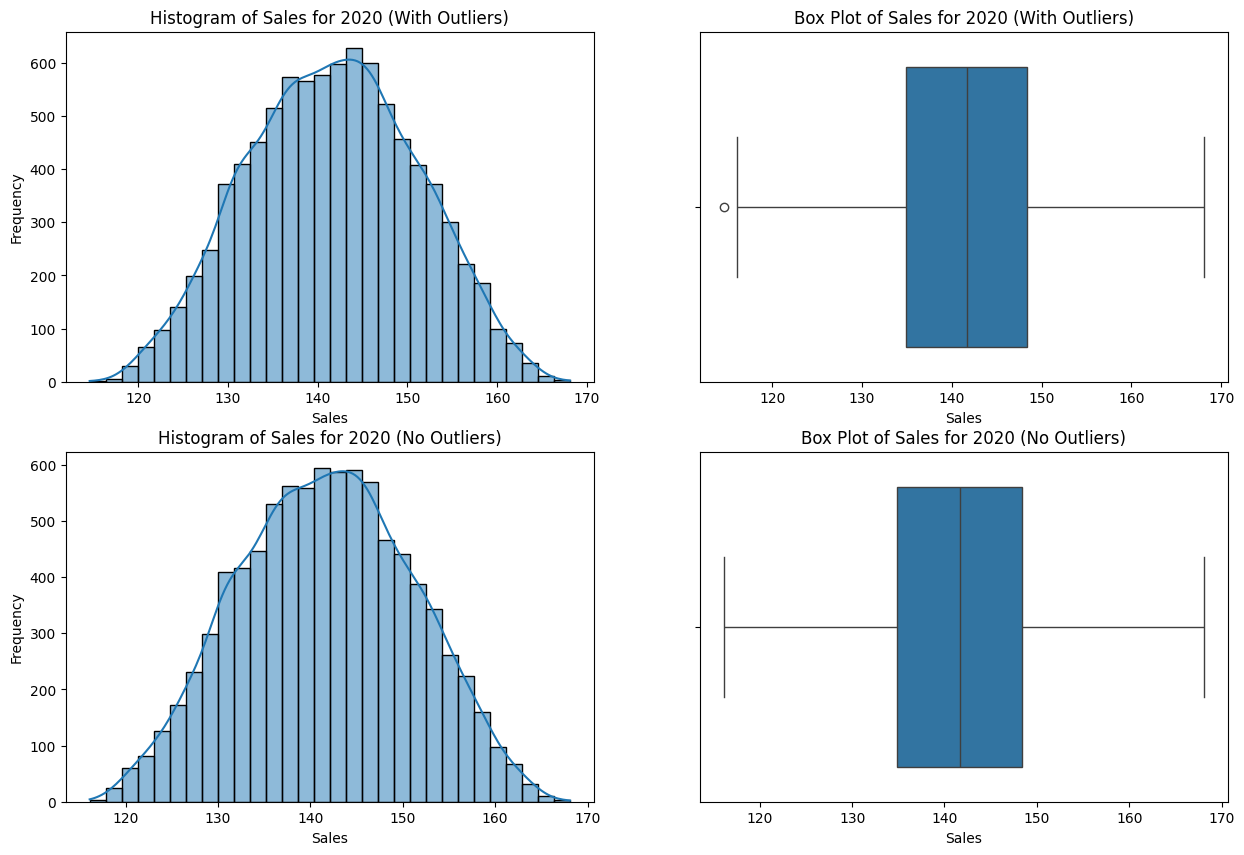

In [30]:
## finding oulier and removing it
# Identify the outlier in 2020
q1_2020 = data[data['Year'] == 2020]['Sales'].quantile(0.25)
q3_2020 = data[data['Year'] == 2020]['Sales'].quantile(0.75)
iqr_2020 = q3_2020 - q1_2020
lower_bound_2020 = q1_2020 - 1.5 * iqr_2020
upper_bound_2020 = q3_2020 + 1.5 * iqr_2020
# Filter out the outlier
data_no_outliers = data[~((data['Year'] == 2020) & ((data['Sales'] < lower_bound_2020) | (data['Sales'] > upper_bound_2020)))]
# Replot the data without the outlier
plt.figure(figsize=(15, 20))

# Filter data for 2020
data_2020 = data[data['Year'] == 2020]

data_2020_no_outliers = data_2020[~((data_2020['Sales'] < lower_bound_2020) | (data_2020['Sales'] > upper_bound_2020))]

# Plot sales data for 2020 with and without outliers
plt.figure(figsize=(15, 10))

# Histogram and box plot with outliers
plt.subplot(2, 2, 1)
sns.histplot(data_2020['Sales'], kde=True, bins=30)
plt.title('Histogram of Sales for 2020 (With Outliers)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_2020['Sales'])
plt.title('Box Plot of Sales for 2020 (With Outliers)')
plt.xlabel('Sales')

# Histogram and box plot without outliers
plt.subplot(2, 2, 3)
sns.histplot(data_2020_no_outliers['Sales'], kde=True, bins=30)
plt.title('Histogram of Sales for 2020 (No Outliers)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_2020_no_outliers['Sales'])
plt.title('Box Plot of Sales for 2020 (No Outliers)')
plt.xlabel('Sales')

# Show the figure
plt.show()